In [1]:
# import libraries
import pandas as pd

In [2]:
# load and view data
df = pd.read_csv('insurance_claim_status.csv')
df.head()

,age,agency,agency_type,commision_value,destination,distribution_channel,duration,gender,net_sales,product_name,claim
0,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1
1,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,F,37.0,Basic Plan,0
2,27,EPX,Travel Agency,0.00,UNITED STATES,Online,28,NaN,13.0,Cancellation Plan,0
3,36,EPX,Travel Agency,0.00,SAUDI ARABIA,Online,1,NaN,34.0,Cancellation Plan,0
4,26,CWT,Travel Agency,23.76,THAILAND,Online,33,NaN,39.6,Rental Vehicle Excess Insurance,0


In [4]:
!pip install ludwig

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.6/151.6 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 7.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas

In [7]:
from ludwig.api import LudwigModel

# import and train model
model = LudwigModel(config='model_definition.yaml')
model.train(dataset=df)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:306: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at ../aten/src/ATen/native/Convolution.cpp:1031.)
  return F.conv1d(input, weight, bias, self.stride,


TrainingResults(train_stats=TrainingStats(training={'claim': {'loss': [16.162973403930664, 0.4036794602870941, 0.38176482915878296, 0.13902874290943146, 0.24742497503757477, 0.2813727557659149, 0.1533142477273941, 0.1343202143907547, 0.13908632099628448, 0.25462156534194946], 'mean_absolute_error': [3.092095375061035, 0.47733402252197266, 0.5243081450462341, 0.2790324091911316, 0.40111175179481506, 0.42465710639953613, 0.3045748174190521, 0.2719261944293976, 0.2740829586982727, 0.41827526688575745], 'mean_absolute_percentage_error': [2057099.5, 293000.5, 335014.90625, 139939.328125, 231860.34375, 205549.484375, 173647.3125, 135489.03125, 134546.40625, 236587.34375], 'mean_squared_error': [16.162973403930664, 0.4036794602870941, 0.38176488876342773, 0.13902877271175385, 0.24742497503757477, 0.2813727855682373, 0.1533142477273941, 0.1343202292919159, 0.13908632099628448, 0.25462156534194946], 'r2': [-96.4260025024414, -1.433269739151001, -1.3011746406555176, 0.1619725227355957, -0.491410

In [8]:
# get predictions
predictions, _ = model.predict(dataset='insurance_claim_status.csv')
predictions.head()

,claim_predictions
0,0.472934
1,0.032298
2,0.101622
3,0.127762
4,0.279444


In [10]:
!pip install ptitprince

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 1.9 MB/s eta 0:00:00
  Created wheel for ptitprince: filename=ptitprince-0.2.7-py3-none-any.whl size=10654 sha256=a18ab834a70697b865af2f1aebdc7349f8b53217d112aac2e9bc77f7aaa3af3f
  Stored in directory: /root/.cache/pip/wheels/0e/43/31/e76a3bf61865543f076a9d9eb027a740caefb379424ecba4e8
Successfully built ptitprince
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


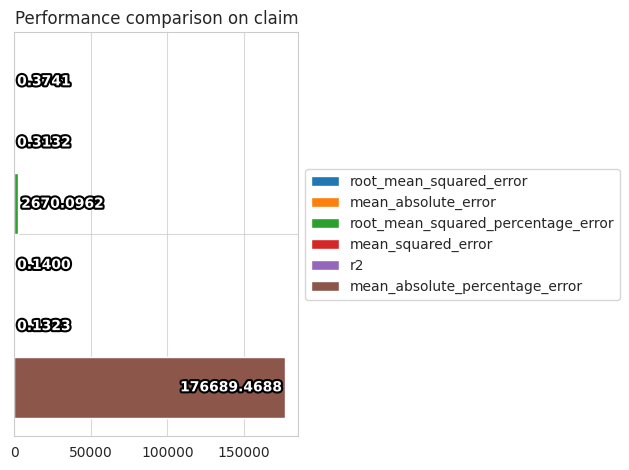

In [11]:
from ludwig.visualize import compare_performance

# evaluate model
eval_stats, _, _ = model.evaluate(dataset='insurance_claim_status.csv')
compare_performance([eval_stats])